<img height="500" width="500" src="https://www.dropbox.com/s/3zsh0uy3uwmxjf2/cutting-down-tree.jpg?dl=1" />

In [1]:
from numericalunits import inch, foot, m, cm

# tree width estimation
# hat_pixels = 258
# hat_length = 11 * inch
# tree_pixels = 916
tree_diam = 33 * inch
bark_depth = 2 * inch
hardwood_diam = tree_diam - 2 * bark_depth
hardwood_radius = hardwood_diam / 2

flooring_length = 12 * foot
flooring_depth = 1 * inch
flooring_min_width = 4 * inch # mbar floors = 2 * inch
cut_kerf = 1/8 * inch
flooring_layer = flooring_depth + cut_kerf

log_length = 6 * inch + flooring_length
log_diam = hardwood_diam

![depth image](https://www.dropbox.com/s/22bv339sxk1lz35/depth-width-diagram.png?dl=1)

In [2]:
from sympy import *
import numpy as np

d, s, w, r = symbols("d s w r")
eq1 = Eq(r, sqrt(s**2 + (w/2)**2))
eq2 = eq1.subs(s, r - d)
eq_w = solve(eq2, w)[0]
print(eq_w)

2*sqrt(d*(-d + 2*r))


\begin{equation}
board\ width = \textbf{floor} \left(2 \sqrt{2 d r - d^2} \right)
\end{equation}

In [3]:
eq3 = eq_w.subs(r, hardwood_radius)
board_width_at_depth = lambdify(d, eq3, "numpy")
board_width_at_depth_inches = lambda d_v: np.floor(board_width_at_depth(d_v * inch) / inch)
board_width_at_depth_inches(1)

10.0

In [4]:
# depths = np.linspace(1, hardwood_diam / inch)
depths = np.arange(flooring_layer/inch, hardwood_diam/inch, flooring_layer/inch)
widths = board_width_at_depth_inches(depths)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

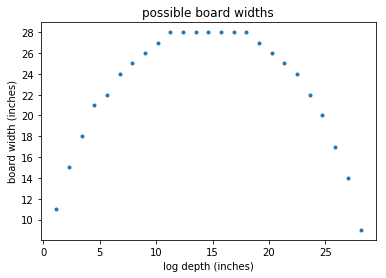

In [6]:
plt.plot(depths, widths, '.')
plt.title('possible board widths')
plt.xlabel('log depth (inches)')
plt.ylabel('board width (inches)')
plt.yticks(np.linspace(10, 28, 10)); # heurstic to make ticks nice

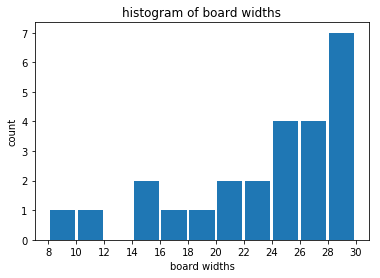

In [7]:
bins = np.linspace(8, 30, 12); # heurstic nice binning
plt.hist(widths, bins, rwidth=0.9)
plt.title('histogram of board widths')
plt.xlabel('board widths')
plt.ylabel('count')
plt.xticks(list(bins)); # label with midpoint of bin


In [8]:
total_boards = len(widths)
total_width = np.sum(widths) * inch / foot
print("%d boards totally %0.1f' in width" % (total_boards, total_width))
milled_length = total_boards * 12
milled_price = milled_length * 0.5
print("milled_price $%d" % milled_price)

25 boards totally 47.4' in width
milled_price $150


## summary

If the tree is ~2.5' wide for the first 12':

**we'd be able to mill 47 boards**
 * 12' long
 * 1" deep
 * widths starting at 10"

we'd need 24' x 2 sides = 48 total.

## future work

mill is probably want to know *exactly* which profiles we want to cut. will have to determine a list.